In [399]:
import pandas as pd
import numpy as np

In [543]:
pd.options.mode.chained_assignment = None  # default='warn'
houshold_raw = pd.read_stata('/Users/maxweber/Downloads/JOLE share/household.dta')

ValueError: Version of given Stata file is 112. pandas supports importing versions 105, 108, 111 (Stata 7SE), 113 (Stata 8/9), 114 (Stata 10/11), 115 (Stata 12), 117 (Stata 13), 118 (Stata 14/15/16),and 119 (Stata 15/16, over 32,767 variables).

In [ ]:
houshold_raw.columns

Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc', 'spouse', 'earn_male', 'earn_female',
       'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens',
       'type', 'reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5',
       'amt5', 'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9',
       'reb10', 'amt10', 'reb11', 'amt11', 'reb12', 'amt12'],
      dtype='object')

# Data Exploration and Descritption

## ToDo:
- is earn_male/female not topcoded
> compare the sum to the total hh income
- 

In [ ]:
houshold_raw.shape

(417829, 48)

In [ ]:
houshold_raw[['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc']].describe()

,swave,year,ehrefper,whfnwgt,tfearn,tftotinc,rf_new,famsize,totearn,totinc
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,2.706346,2008.609352,101.236724,3165.464649,5259.549957,5760.240783,2.571911,2.845865,4950.686035,5392.017578
std,1.342574,0.487896,4.006889,1275.666959,5781.356315,5822.155966,1.389535,1.567134,5646.872070,5679.446289
min,1.000000,2008.000000,101.000000,0.000000,-50000.000000,-48591.000000,1.000000,1.000000,-50000.000000,-50000.000000
25%,2.000000,2008.000000,101.000000,2191.241500,1650.000000,2161.000000,1.000000,2.000000,1443.000000,1906.000000
50%,3.000000,2009.000000,101.000000,3050.485400,3984.000000,4351.000000,2.000000,3.000000,3634.000000,4001.000000
75%,4.000000,2009.000000,101.000000,3907.595200,7167.000000,7591.000000,4.000000,4.000000,6751.000000,7116.000000
max,5.000000,2009.000000,205.000000,25529.882800,98083.000000,101970.000000,28.000000,22.000000,98083.000000,98686.000000


In [ ]:
houshold_raw[[ 'spouse', 'earn_male', 'earn_female', 'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 
          'totcens','type', 'reb_spend', 'reb_save', 'reb_debt']].describe()

,spouse,earn_male,earn_female,sex_if_single,flex,moonlit,selfemp,totwork,totcens,type,reb_spend,reb_save,reb_debt
count,417829.000000,311053.000000,348261.000000,176344.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.577952,4118.764648,2260.470215,1.605498,0.560521,0.022469,0.175218,1.170443,0.038437,1.244471,0.267959,0.161320,0.617985
std,0.495003,4972.812012,3066.344238,0.489045,0.655534,0.152112,0.423538,0.673011,0.200358,0.429727,0.565415,0.462197,0.713390
min,0.000000,-50000.000000,-20588.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1198.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3124.000000,1583.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5417.000000,3333.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,96244.000000,93500.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#houshold[-['swave', 'famsize', 'tfearn', 'ssuid', 'epppnum', 'spouse', 'whfnwgt', 'flex', 'srefmon']].columns
unknown_var_lst = houshold_raw[houshold_raw.columns.difference(['swave', 'famsize', 'tfearn', 'ssuid', 'epppnum',
                                                        'spouse', 'whfnwgt', 'flex', 'srefmon','amt10', 'amt11', 
                                                        'amt12', 'amt4', 'amt5', 'amt6', 'amt7', 'amt8','amt9',
                                                       'reb10', 'reb11', 'reb12', 'reb4', 'reb5', 'reb6', 'reb7', 
                                                        'reb8','reb9'])].columns

# columns not used/described by Powell
unknown_var_lst.sort

<bound method Index.sort of Index(['earn_female', 'earn_male', 'ehrefper', 'month', 'moonlit', 'reb_debt',
       'reb_save', 'reb_spend', 'rf_new', 'selfemp', 'sex_if_single', 'tage',
       'tftotinc', 'totcens', 'totearn', 'totinc', 'totwork', 'tpearn',
       'tptotinc', 'type', 'year'],
      dtype='object')>

In [ ]:
print('!!include as dummy !! \n paper: month relative to interview month \n')
houshold_raw['srefmon'].unique()

!!include as dummy !! 
 paper: month relative to interview month 



['Fourth Reference month', 'First Reference month', 'Second Reference month', 'Third Reference month']
Categories (4, object): ['First Reference month' < 'Second Reference month' < 'Third Reference month' < 'Fourth Reference month']

In [ ]:
print('\n percentage of HHs getting rebate: ', houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 
                'reb10', 'reb11', 'reb12']].describe()[1:2].sum().sum(),'\n')

houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 'reb10', 'reb11', 'reb12']].describe()


 percentage of HHs getting rebate:  0.8130646876525134 



,reb4,reb5,reb6,reb7,reb8,reb9,reb10,reb11,reb12
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.058196,0.242484,0.266724,0.182261,0.038202,0.010966,0.006955,0.005158,0.002118
std,0.234093,0.428915,0.441937,0.386899,0.191129,0.103797,0.082946,0.071507,0.045937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

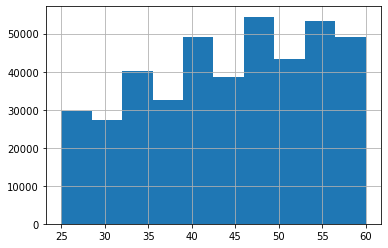

In [ ]:
houshold_raw['tage'].hist()

In [ ]:
houshold_raw[['earn_male', 'earn_female']].describe()

,earn_male,earn_female
count,311053.000000,348261.000000
mean,4118.764648,2260.470215
std,4972.812012,3066.344238
min,-50000.000000,-20588.000000
25%,1198.000000,0.000000
50%,3124.000000,1583.000000
75%,5417.000000,3333.000000
max,96244.000000,93500.000000


# Data Cleaning 

- keep if swave<3
- replace month=12+month if year==2009
- minmonth=min(month), by(ssuid epppnum) ?
- famsize=6 if famsize>6 (keep?)
- pp=group(ssuid epppnum)
    -> bys pp: keep if _N==8
- ??? rebate: replace X=X/1000 ???

## ToDo:

- drop observations with rebate_month not in observations?
- robustness check(?): keep all waves and see if longer timeframes available for sufficiently large N
- topcoding? income<0; familysize; 
- tpearn= tfearn ?
- create dummies for variables to control for in tau 
> start with the variables used in the paper. 'interactions permit the earnings distribution to shift based on':
> - marital status
> - family size 
> - month
> - month relative to the interview month

- **optional**: add assert statements to the functions for error handling

(198574, 49)

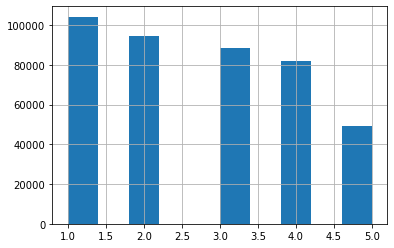

In [267]:
houshold_raw['swave'].hist()
houshold = houshold_raw[houshold_raw.swave <= 2]
houshold.shape

# Create Variables
- pp as index
- pp_count to subset to houshold available for 8 periods 
- month_total
- amt_tot
- everreb
- min_month
- reb_month
- lag_time
- change_spouse

## ToDo

- define mu_i
- dummies for houshold characteristics-groupings
- **check that housholds with multiple individuals are not duplicated**
> - pp is unique identifier from epppnum + ssuid, ssuid is the HH-id
> - to have some individual data, both individuals are in the data set
> - explore observations grouped by ssuid with count(ssuid) > 1


In [268]:
houshold['ssuid'] = houshold['ssuid'].astype(int)

In [269]:
#houshold['epppnum'].unique().shape #11
#houshold['ssuid'].unique().shape #26519

houshold['pp'] = houshold.groupby(['ssuid','epppnum']).ngroup() #26569 unique
pp_count = houshold.groupby(['pp']).size() # need index for merging!

houshold = houshold.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
houshold = houshold[houshold['pp_count']== 8]

print(len(houshold['pp'].unique())) #  N = 22998 as in figure 1 (results) Powell(2020) (dropped ~4k)
print(len(houshold['ssuid'].unique()))
houshold.shape # (198574, 51)

22998
22998


(183984, 50)

there are a lot of HHs with more than 8 periods available!


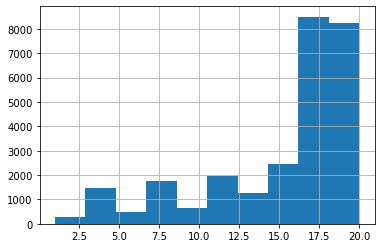

In [270]:
houshold2 = houshold_raw
houshold2['pp'] = houshold_raw.groupby(['ssuid','epppnum']).ngroup() #26569 unique
#houshold2.drop('pp', axis=1, inplace=True)
pp_count = houshold2.groupby(['pp']).size() # need index for merging!
pp_count.hist()
del houshold2
#houshold2 = houshold2.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
#houshold2[houshold2['pp_count']< 8].shape
print('there are a lot of HHs with more than 8 periods available!')

In [271]:
houshold.set_index('pp', inplace = True)
houshold.head()

,ssuid,swave,srefmon,month,year,ehrefper,whfnwgt,tfearn,tftotinc,epppnum,...,amt8,reb9,amt9,reb10,amt10,reb11,amt11,reb12,amt12,pp_count
pp,,,,,,,,,,,,,,,,,,,,,
0,19128000276,2,Fourth Reference month,January,2009,101,3973.9954,0,381,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,First Reference month,June,2008,101,3282.6489,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Second Reference month,July,2008,101,3269.0889,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Third Reference month,August,2008,101,3262.1228,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Fourth Reference month,September,2008,101,3242.7625,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [272]:
houshold['amt_tot'] = houshold[['amt4', 'amt5', 'amt6','amt7', 'amt8','amt9', 'amt10', 'amt11', 'amt12']].sum(axis=1)
houshold['amt_tot'].describe()

count    183984.000000
mean        728.870422
std         560.518372
min           0.000000
25%         300.000000
50%         600.000000
75%        1200.000000
max        4500.000000
Name: amt_tot, dtype: float64

In [273]:
#  sum of all rebate dummy columns
houshold['everreb'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11', 'reb12']].sum(axis=1)
houshold['everreb'].describe()

count    183984.000000
mean          0.816941
std           0.386538
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: everreb, dtype: float64


 If unable to use NaN in lags, also look for which timeframe has the largest obs-count 



<AxesSubplot:>

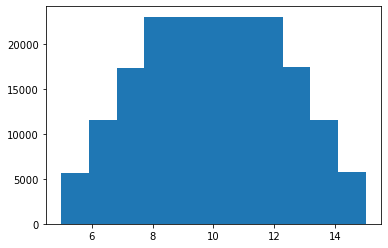

In [274]:
month_number_dict = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

houshold.replace({'month': month_number_dict}, inplace = True)

# lambda function to get total month (Jan 2008 != Jan 2009)
def get_total_month(year,month):
    if year == 2009:
        return month+12
    else:
        return month
        
houshold['month_total'] = houshold.apply(lambda x: get_total_month(x['year'],x['month']),axis=1)

print('\n If unable to use NaN in lags, also look for which timeframe has the largest obs-count \n')

houshold['month_total'].hist(grid=False, bins = len(houshold['month_total'].unique()))

In [275]:
# get month of payout from rebX columns
houshold['reb_month'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11',
          'reb12']].idxmax(axis=1).str.slice(start = 3)

def correct_reb_month(reb_month,everreb):
    if everreb == 0:
        return np.NaN
    else:
        return reb_month
        
houshold['reb_month'] = houshold.apply(lambda x: correct_reb_month(x['reb_month'],x['everreb']),axis=1)

houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [276]:
#houshold[houshold['reb_month']<=7]['reb_month'].hist()
#houshold[houshold['reb_month']>7]['reb_month'].hist()
houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [277]:
houshold['reb_month'] = pd.to_numeric(houshold['reb_month'])
houshold['lag_time'] =  houshold['month_total'] - houshold['reb_month']
print(houshold['lag_time'].unique())
houshold['lag_time'].describe()

[nan  8.  1.  2.  3.  4.  5.  6.  7.  0.  9. -1. -2. -4. -3. -5. 10. 11.
 -6. -7.]


count    150304.000000
mean          3.995423
std           2.807277
min          -7.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: lag_time, dtype: float64

In [278]:
# generate dummy for change in maritial status
spouse_sum = houshold.groupby(['pp'])['spouse'].sum()
houshold = houshold.merge(houshold.groupby(['pp'])['spouse'].sum(), on = 'pp', how = 'left' )
houshold['spouse'] = houshold['spouse_x']
houshold['spouse_sum'] = houshold['spouse_y']
houshold.drop('spouse_x', axis = 1, inplace = True)
houshold.drop('spouse_y', axis = 1, inplace = True)

#houshold[['spouse', 'spouse_sum']].describe()
#houshold['spouse_sum'].unique()

def get_change_spouse(spouse_sum):
    if spouse_sum == 0 or spouse_sum == 8 :
        return 0
    else:
        return 1
        
houshold['change_spouse'] = houshold.apply(lambda x: get_change_spouse(x['spouse_sum']),axis=1)

houshold[['change_spouse', 'spouse_sum']].describe()

,change_spouse,spouse_sum
count,183984.000000,183984.000000
mean,0.006305,4.617662
std,0.079153,3.943544
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,8.000000
75%,0.000000,8.000000
max,1.000000,8.000000


# Subset df for the analysis 

Dataframe containing only the variables used in the analysis. 
The first subset is the default dataset without any grouping dummies, but all variables as standard control variables.
Each grouping-setup will have its own subset.

## Outcome: 
select row for each HH with lag_time (lag_lead) of interest
- **tf_earn**: model as absolute value or as percentage change?

## Covariates:
- **dummy variables**: spouse, change_spouse, reb_month, srefmon, famsize, change_famsize 
- **continous variables**: tot_rebate, see variables used for heterogeneity estimation
> - per robustness checks included/excluded
>> How are the papers handling this?




#### HH specific Intercept - mu_i
that captures differences in the average level of labor income across households

#### HH types (groups) for Heterogeneity 
- non-labor earnings (= total earnings - labor earnings) as measure for liquidity?
> - multiple ways to calculate and group this variable (amount; ratio of labor/non-labor)
- changes in non_labor earnigns? are assets sold?
- age (tage)
- earn_male larger/smaller earn_female
> - also include lags of this? e.g. income 6 months before

# ToDo:
- get change variable for famsize
- (*change lag_time to leads_lags*)
- use longer timeframe than 8 months? -> expand total_month calculation

# Open Questions:

- **month relative to interview month**: srefmonth-reb_month? see Stata Code
> - amount variables for each type of work e.g.  TMLMSUM (Amount of income from moonlighting or extra jobs in this month)
> - TOTHPROP or EAST4A Rental property owned -> search assets/property


In [ ]:
# write function that returns a df with the row values as columns for each year.

# drop NaN in lag_time column?
# use on df without NaN in lag_time period
def get_pivoted_feature(df, col_name):
    rslt_df = df.pivot(columns = 'lag_time', values = col_name)
    clm_lst = []
    for i in range(len(rslt_df.columns)):
        clm_lst.append(col_name + str(str(rslt_df.columns[i])[0:-2]))
    rslt_df.columns = clm_lst
    return rslt_df

get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0) #.describe()


houshold.reset_index(inplace = True)

pivoted_reb = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0)
reb_cols = pivoted_reb.columns
houshold = houshold.merge(pivoted_reb, how ='outer', left_index = True, right_index=True)
houshold.set_index(['pp'], inplace=True)

houshold[houshold['everreb'].notnull()][reb_cols]

In [290]:
houshold.to_csv('/Users/maxweber/Downloads/JOLE share/household.csv')

# Fixed Effects Analysis on Powell Dataset

In [487]:
houshold = pd.read_csv('/Users/maxweber/Downloads/JOLE share/household.csv')
houshold.columns

Index(['pp', 'index', 'Unnamed: 0', 'ssuid', 'swave', 'srefmon', 'month',
       'year', 'ehrefper', 'whfnwgt', 'tfearn', 'tftotinc', 'epppnum', 'tage',
       'tpearn', 'tptotinc', 'rf_new', 'famsize', 'totearn', 'totinc',
       'earn_male', 'earn_female', 'sex_if_single', 'flex', 'moonlit',
       'selfemp', 'totwork', 'totcens', 'type', 'reb_spend', 'reb_save',
       'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5', 'reb6', 'amt6', 'reb7',
       'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10', 'amt10', 'reb11',
       'amt11', 'reb12', 'amt12', 'pp_count', 'amt_tot', 'everreb',
       'month_total', 'reb_month', 'lag_time', 'spouse', 'spouse_sum',
       'change_spouse', 'everreb-7', 'everreb-6', 'everreb-5', 'everreb-4',
       'everreb-3', 'everreb-2', 'everreb-1', 'everreb0', 'everreb1',
       'everreb2', 'everreb3', 'everreb4', 'everreb5', 'everreb6', 'everreb7',
       'everreb8', 'everreb9', 'everreb10', 'everreb11'],
      dtype='object')

In [416]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [383]:
houshold.reset_index(inplace = True, drop = False)
houshold.set_index(['ssuid', 'month_total'], inplace=True, drop=False)
houshold[houshold['everreb'].notnull()][reb_cols]

everreb-7  everreb-6  everreb-5  everreb-4  \
ssuid        month_total                                               
19128000276  13                 NaN        NaN        NaN        NaN   
             6                  NaN        NaN        NaN        NaN   
             7                  NaN        NaN        NaN        NaN   
             8                  NaN        NaN        NaN        NaN   
             9                  NaN        NaN        NaN        NaN   
...                             ...        ...        ...        ...   
955958398688 8                  0.0        0.0        0.0        0.0   
             9                  0.0        0.0        0.0        0.0   
             10                 0.0        0.0        0.0        0.0   
             11                 0.0        0.0        0.0        0.0   
             12                 0.0        0.0        0.0        0.0   

                          everreb-3  everreb-2  everreb-1  everreb0  everreb1  \
ssuid        month_total                                                        
19128000276  13                 NaN        NaN        NaN       NaN       NaN   
             6                  NaN        NaN        NaN       NaN       NaN   
             7                  NaN        NaN        NaN       NaN       NaN   
             8                  NaN        NaN        NaN       NaN       NaN   
             9                  NaN        NaN        NaN       NaN       NaN   
...                             ...        ...        ...       ...       ...   
955958398688 8                  0.0        0.0        1.0       0.0       0.0   
             9                  0.0        0.0        0.0       1.0       0.0   
             10                 0.0        0.0        0.0       0.0       1.0   
             11                 0.0        0.0        0.0       0.0       0.0   
             12                 0.0        0.0        0.0       0.0       0.0   

                          everreb2  everreb3  everreb4  everreb5  everreb6  \
ssuid        month_total                                                     
19128000276  13                NaN       NaN       NaN       NaN       NaN   
             6                 NaN       NaN       NaN       NaN       NaN   
             7                 NaN       NaN       NaN       NaN       NaN   
             8                 NaN       NaN       NaN       NaN       NaN   
             9                 NaN       NaN       NaN       NaN       NaN   
...                            ...       ...       ...       ...       ...   
955958398688 8                 0.0       0.0       0.0       0.0       0.0   
             9                 0.0       0.0       0.0       0.0       0.0   
             10                0.0       0.0       0.0       0.0       0.0   
             11                1.0       0.0       0.0       0.0       0.0   
             12                0.0       1.0       0.0       0.0       0.0   

                          everreb7  everreb8  everreb9  everreb10  everreb11  
ssuid        month_total                                                      
19128000276  13                NaN       NaN       NaN        NaN        NaN  
             6                 NaN       NaN       NaN        NaN        NaN  
             7                 NaN       NaN       NaN        NaN        NaN  
             8                 NaN       NaN       NaN        NaN        NaN  
             9                 NaN       NaN       NaN        NaN        NaN  
...                            ...       ...       ...        ...        ...  
955958398688 8                 0.0       0.0       0.0        0.0        0.0  
             9                 0.0       0.0       0.0        0.0        0.0  
             10                0.0       0.0       0.0        0.0        0.0  
             11                0.0       0.0       0.0        0.0        0.0  
             12                0.0       0.0       0.0        0.0       

In [371]:
houshold.loc[19128038046][['everreb-7', 'everreb-6', 'everreb-5', 'everreb-4', 'everreb-3','everreb-2', 'everreb-1', 'everreb0', 'everreb1', 'everreb2',
          'everreb3', 'everreb4', 'everreb5', 'everreb6', 'everreb7', 'everreb8','everreb9', 'everreb10', 'everreb11']]

,everreb-7,everreb-6,everreb-5,everreb-4,everreb-3,everreb-2,everreb-1,everreb0,everreb1,everreb2,everreb3,everreb4,everreb5,everreb6,everreb7,everreb8,everreb9,everreb10,everreb11
month_total,,,,,,,,,,,,,,,,,,,
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [331]:
exog_vars = houshold[['everreb-2', 'everreb-1', 'everreb0', 'everreb1', 'everreb2','everreb3', 'everreb4']].multiply(houshold['amt_tot'], axis = 'index')
exog = sm.add_constant(exog_vars)

model = PanelOLS(houshold['tfearn'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)

model.fit().params

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/linearmodels/panel/model.py:1184: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


const        5121.902088
everreb-2       0.056597
everreb-1       0.070429
everreb0        0.041484
everreb1        0.020971
everreb2        0.020389
everreb3        0.008273
everreb4        0.028760
Name: parameter, dtype: float64

In [404]:
def get_grouping(df_column, group_dict, reb_dummies_df, naming_interaction = 'j'):
    # get flag indicating the group with the dictionary-mapping:
    new_col = df_column.apply(lambda x: next((k for k, v in group_dict.items() if x in v), 0))
    new_col = new_col.rename(new_col.name + '_flag')
    new_cols = pd.get_dummies(new_col) # get dummies from group flag


   # create interaction dummies (group-dummy * rebatelag_dummy) iterating over each group_id and concatenating in the end:
    df_group_interactions = pd.DataFrame(df_column) # for initialization with correct index
    group_lst = group_dict.keys()
    for group_id in group_lst:
        dummies_group = reb_dummies_df.multiply(new_cols[group_id], axis = 'index')
        
        new_dummy_names = []
        for name in dummies_group.columns:
            new_dummy_names.append(name + '-' + naming_interaction + str(group_id))
        dummies_group.columns = new_dummy_names
        df_group_interactions = df_group_interactions.merge(dummies_group,left_index= True, right_index=True)
        df_group_interactions.replace(np.NaN, 0, inplace = True)
    return df_group_interactions

In [384]:
houshold.drop(['ssuid','month_total'], inplace=True, axis = 1)
houshold.reset_index(inplace=True)
houshold.columns

Index(['ssuid', 'month_total', 'level_0', 'pp', 'index', 'Unnamed: 0', 'swave',
       'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt', 'tfearn', 'tftotinc',
       'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new', 'famsize', 'totearn',
       'totinc', 'earn_male', 'earn_female', 'sex_if_single', 'flex',
       'moonlit', 'selfemp', 'totwork', 'totcens', 'type', 'reb_spend',
       'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5', 'reb6', 'amt6',
       'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10', 'amt10',
       'reb11', 'amt11', 'reb12', 'amt12', 'pp_count', 'amt_tot', 'everreb',
       'reb_month', 'lag_time', 'spouse', 'spouse_sum', 'change_spouse',
       'everreb-7', 'everreb-6', 'everreb-5', 'everreb-4', 'everreb-3',
       'everreb-2', 'everreb-1', 'everreb0', 'everreb1', 'everreb2',
       'everreb3', 'everreb4', 'everreb5', 'everreb6', 'everreb7', 'everreb8',
       'everreb9', 'everreb10', 'everreb11'],
      dtype='object')

In [449]:
houshold = houshold.groupby(['ssuid', 'month_total'])[['ssuid', 'tfearn', 'amt_tot','tftotinc', 'month_total', 'reb_month', 'spouse', 'famsize', 'srefmon',
                                                        'everreb0', 'everreb1', 'everreb2', 'everreb3']].agg({'tfearn': 'first',
                                                                                                            'reb_month': 'first',
                                                                                                             'tftotinc': 'first',
                                                                                                             'amt_tot': 'sum',
                                                                                                             'famsize': 'first',
                                                                                                             'spouse': 'first', 
                                                                                                             'srefmon': 'first',
                                                                                                             'everreb0': 'first',
                                                                                                             'everreb1': 'first',
                                                                                                             'everreb2': 'first',
                                                                                                             'everreb3': 'first'})
houshold[['amt_tot', 'tfearn', 'spouse', 'famsize', 'srefmon']].describe()

,amt_tot,tfearn,spouse,famsize
count,183984.000000,183984.000000,183984.000000,183984.000000
mean,728.733716,5368.512338,0.577208,2.826893
std,560.627952,5848.215216,0.494004,1.554868
min,0.000000,-46667.000000,0.000000,1.000000
25%,300.000000,1732.000000,0.000000,2.000000
50%,600.000000,4045.000000,1.000000,3.000000
75%,1200.000000,7298.000000,1.000000,4.000000
max,4500.000000,98083.000000,1.000000,22.000000


In [484]:
# analysis on subset with interactions terms:
powell_hh = houshold[['amt_tot', 'tfearn']]
powell_hh['reb'] = houshold['everreb0'] + houshold['everreb1']
powell_hh['reb_lag'] = houshold['everreb2'] + houshold['everreb3']
powell_hh['erbatamt'] = powell_hh['amt_tot'].multiply(powell_hh['reb'], axis = 'index')  # so that it is 0 in the months without rebate payout
powell_hh['erbatamt_lag'] = powell_hh['amt_tot'].multiply(powell_hh['reb_lag'], axis = 'index')
#interaction terms based on  marital status, household size, month (and month relative to interview month)
powell_hh[['spouse', 'famsize', 'srefmon']] = houshold[['spouse', 'famsize', 'srefmon']]

ems_interactions = powell_hh[['reb', 'reb_lag']].multiply(powell_hh['spouse'], axis='index')
ems_interactions.columns = ['ems_reb', 'ems_reb_lag']

ehhnumpp_dict = {1:range(1,2), 2:range(2,3), 3: range(3,4), 4: range(5,20)} # group 4 has to be omitted to get full rank?
hhsize_interactions = get_grouping(powell_hh['famsize'], ehhnumpp_dict, powell_hh[['reb', 'reb_lag']], 'hhsize')

srefmon_dict = {1:'First Reference month', 2:'Second Reference month', 3:'Third Reference month', 4:'Fourth Reference month'}
srefmon_interactions = get_grouping(powell_hh['srefmon'], srefmon_dict, powell_hh[['reb', 'reb_lag']], 'srefmon')

powell_hh = pd.concat([powell_hh,ems_interactions,hhsize_interactions, srefmon_interactions], axis = 1)
powell_hh.columns
powell_hh.replace(np.NaN,0, inplace=True)

In [485]:
exog_vars = powell_hh[['reb', 'reb_lag']]
exog = sm.add_constant(exog_vars)

model_base_reb = PanelOLS(powell_hh['erbatamt'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_base_reb = model_base_reb.fit()
params_base_reb

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Dep. Variable:,erbatamt,R-squared:,0.7049
Estimator:,PanelOLS,R-squared (Between):,0.6034
No. Observations:,183984,R-squared (Within):,0.7704
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.7462
Time:,14:41:58,Log-likelihood,-1.184e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.923e+05
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,160974)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,1.923e+05


In [408]:
# rebate lag amount with reb and reb lag only 
exog_vars = powell_hh[['reb', 'reb_lag']]
exog = sm.add_constant(exog_vars)

model_base_reb_lag = PanelOLS(powell_hh['erbatamt_lag'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_base_reb_lag = model_base_reb_lag.fit()
params_base_reb_lag

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/linearmodels/panel/model.py:1184: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,erbatamt_lag,R-squared:,0.7369
Estimator:,PanelOLS,R-squared (Between):,0.0693
No. Observations:,150304,R-squared (Within):,0.7692
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.7452
Time:,10:38:06,Log-likelihood,-1.08e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.842e+05
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,131504)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,1.842e+05


In [423]:
# first stage fitted rebate with interactions 
exog_vars = powell_hh[['reb', 'reb_lag', 'reb-hhsize1', 'reb_lag-hhsize1', 'reb-hhsize2', 'reb_lag-hhsize2',
                       'reb-hhsize3', 'reb_lag-hhsize3', 'reb-srefmon1', 'reb_lag-srefmon1',
                       'reb-srefmon2','reb_lag-srefmon2', 'reb-srefmon3', 'reb_lag-srefmon3', 'ems_reb', 'ems_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_interactions = PanelOLS(powell_hh['erbatamt'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_interactions = model_interactions.fit()
params_interactions

Dep. Variable:,erbatamt,R-squared:,0.7970
Estimator:,PanelOLS,R-squared (Between):,0.6947
No. Observations:,150304,R-squared (Within):,0.8521
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.8326
Time:,10:55:36,Log-likelihood,-9.491e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3.227e+04
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(16,131490)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,3.227e+04


In [424]:
# first stage fitted rebate lag with interactions 
exog_vars = powell_hh[['reb', 'reb_lag', 'reb-hhsize1', 'reb_lag-hhsize1', 'reb-hhsize2', 'reb_lag-hhsize2',
                       'reb-hhsize3', 'reb_lag-hhsize3', 'reb-srefmon1', 'reb_lag-srefmon1',
                       'reb-srefmon2','reb_lag-srefmon2', 'reb-srefmon3', 'reb_lag-srefmon3', 'ems_reb', 'ems_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_interactions = PanelOLS(powell_hh['erbatamt_lag'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_interactions = model_interactions.fit()
params_interactions

Dep. Variable:,erbatamt_lag,R-squared:,0.8293
Estimator:,PanelOLS,R-squared (Between):,0.3963
No. Observations:,150304,R-squared (Within):,0.8503
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.8347
Time:,10:55:45,Log-likelihood,-1.047e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3.994e+04
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(16,131490)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,3.994e+04


# To Do Donnerstag, 9.6.
- (Cluster Variance besser verstehen, Beispiel finden)
- X 2SLS FE aus dem Stata Code besser verstehen
- Dummies implementieren wie im Stata Code und FE 2SLS neu estimaten

# Ungrouped (HH-Clustered) 2SLS FE approach

In [539]:
temp = pd.read_csv('/Users/maxweber/Downloads/JOLE share/household.csv')
temp.drop('Unnamed: 0', inplace = True, axis=1)
hh2 = temp.set_index(['ssuid', 'month_total'], drop=False) # to use for ungrouped analysis with cluster on hh
del temp

hh2.fillna(0,inplace=True)
hh2.head()

pp  index        ssuid  swave  \
ssuid       month_total                                  
19128000276 13            0      0  19128000276      2   
            6             0      1  19128000276      1   
            7             0      2  19128000276      1   
            8             0      3  19128000276      1   
            9             0      4  19128000276      1   

                                        srefmon  month  year  ehrefper  \
ssuid       month_total                                                  
19128000276 13           Fourth Reference month      1  2009       101   
            6             First Reference month      6  2008       101   
            7            Second Reference month      7  2008       101   
            8             Third Reference month      8  2008       101   
            9            Fourth Reference month      9  2008       101   

                           whfnwgt  tfearn  ...  everreb2  everreb3  everreb4  \
ssuid       month_total                     ...                                 
19128000276 13           3973.9954       0  ...       0.0       0.0       0.0   
            6            3282.6489       0  ...       0.0       0.0       0.0   
            7            3269.0889       0  ...       0.0       0.0       0.0   
            8            3262.1228       0  ...       0.0       0.0       0.0   
            9            3242.7625       0  ...       0.0       0.0       0.0   

                        everreb5 everreb6  everreb7  everreb8  everreb9  \
ssuid       month_total                                                   
19128000276 13               0.0      0.0       0.0       0.0       0.0   
            6                0.0      0.0       0.0       0.0       0.0   
            7                0.0      0.0       0.0       0.0       0.0   
            8                0.0      0.0       0.0       0.0       0.0   
            9                0.0      0.0       0.0       0.0       0.0   

                         everreb10  everreb11  
ssuid       month_total                        
19128000276 13                 0.0        0.0  
            6                  0.0        0.0  
            7                  0.0        0.0  
            8                  0.0        0.0  
            9                  0.0        0.0  

[5 rows x 77 columns]

In [490]:
# analysis on subset with interactions terms:
hh_clustered = hh2[['amt_tot', 'tfearn']]
hh_clustered['reb'] = hh2['everreb0'] + hh2['everreb1']
hh_clustered['reb_lag'] = hh2['everreb2'] + hh2['everreb3']
hh_clustered['erbatamt'] = hh_clustered['amt_tot'].multiply(hh_clustered['reb'], axis = 'index')  # so that it is 0 in the months without rebate payout
hh_clustered['erbatamt_lag'] = hh_clustered['amt_tot'].multiply(hh_clustered['reb_lag'], axis = 'index')
#interaction terms based on  marital status, household size, month (and month relative to interview month)
hh_clustered[['spouse', 'famsize', 'srefmon']] = hh2[['spouse', 'famsize', 'srefmon']]

ems_interactions = hh_clustered[['reb', 'reb_lag']].multiply(hh_clustered['spouse'], axis='index')
ems_interactions.columns = ['ems_reb', 'ems_reb_lag']

ehhnumpp_dict = {1:range(1,2), 2:range(2,3), 3: range(3,4), 4: range(5,20)} # group 4 has to be omitted to get full rank?
hhsize_interactions = get_grouping(hh_clustered['famsize'], ehhnumpp_dict, hh_clustered[['reb', 'reb_lag']], 'hhsize')

srefmon_dict = {1:'First Reference month', 2:'Second Reference month', 3:'Third Reference month', 4:'Fourth Reference month'}
srefmon_interactions = get_grouping(hh_clustered['srefmon'], srefmon_dict, hh_clustered[['reb', 'reb_lag']], 'srefmon')

hh_clustered = pd.concat([hh_clustered,ems_interactions,hhsize_interactions, srefmon_interactions], axis = 1)
hh_clustered.columns

Index(['amt_tot', 'tfearn', 'reb', 'reb_lag', 'erbatamt', 'erbatamt_lag',
       'spouse', 'famsize', 'srefmon', 'ems_reb', 'ems_reb_lag', 'famsize',
       'reb-hhsize1', 'reb_lag-hhsize1', 'reb-hhsize2', 'reb_lag-hhsize2',
       'reb-hhsize3', 'reb_lag-hhsize3', 'reb-hhsize4', 'reb_lag-hhsize4',
       'srefmon', 'reb-srefmon1', 'reb_lag-srefmon1', 'reb-srefmon2',
       'reb_lag-srefmon2', 'reb-srefmon3', 'reb_lag-srefmon3', 'reb-srefmon4',
       'reb_lag-srefmon4'],
      dtype='object')

In [491]:
# first stage fitted rebate with interactions 
exog_vars = hh_clustered[['reb', 'reb_lag', 'reb-hhsize1', 'reb_lag-hhsize1', 'reb-hhsize2', 'reb_lag-hhsize2',
                       'reb-hhsize3', 'reb_lag-hhsize3', 'reb-srefmon1', 'reb_lag-srefmon1',
                       'reb-srefmon2','reb_lag-srefmon2', 'reb-srefmon3', 'reb_lag-srefmon3', 'ems_reb', 'ems_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_interactions_clust = PanelOLS(hh_clustered['erbatamt'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_interactions_clust = model_interactions_clust.fit(cov_type='clustered', cluster_entity = True)
params_interactions_clust

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Dep. Variable:,erbatamt,R-squared:,0.8099
Estimator:,PanelOLS,R-squared (Between):,0.7447
No. Observations:,183984,R-squared (Within):,0.8521
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.8366
Time:,14:43:35,Log-likelihood,-1.143e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,4.286e+04
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(16,160960)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,4398.3


In [492]:
# first stage fitted rebate lag with interactions 
exog_vars = hh_clustered[['reb', 'reb_lag', 'reb-hhsize1', 'reb_lag-hhsize1', 'reb-hhsize2', 'reb_lag-hhsize2',
                       'reb-hhsize3', 'reb_lag-hhsize3', 'reb-srefmon1', 'reb_lag-srefmon1',
                       'reb-srefmon2','reb_lag-srefmon2', 'reb-srefmon3', 'reb_lag-srefmon3', 'ems_reb', 'ems_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_interactions_lag_clust = PanelOLS(hh_clustered['erbatamt_lag'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_interactions_lag_clust = model_interactions_lag_clust.fit(cov_type='clustered', cluster_entity = True)
params_interactions_lag_clust

Dep. Variable:,erbatamt_lag,R-squared:,0.8336
Estimator:,PanelOLS,R-squared (Between):,0.6118
No. Observations:,183984,R-squared (Within):,0.8503
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.8378
Time:,14:43:52,Log-likelihood,-1.264e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,5.04e+04
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(16,160960)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,6035.2


In [493]:
# generate fitted values for the second stage regression:
#hh_clustered.drop(['erbatamt_fitted_base_reb', 'erbatamt_fitted_base_reb_lag'], axis = 1, inplace=True)
print(params_interactions_clust.params.loc[['reb', 'reb_lag']])
print(params_interactions_lag_clust.params.loc[['reb', 'reb_lag']])


erbatamt_fitted_base_reb = params_interactions_clust.fitted_values
erbatamt_fitted_base_reb.columns = ['erbatamt_fitted_base_reb']

erbatamt_fitted_base_reb_lag = params_interactions_lag_clust.fitted_values
erbatamt_fitted_base_reb_lag.columns = ['erbatamt_fitted_base_reb_lag']

hh_clustered = pd.concat([hh_clustered,erbatamt_fitted_base_reb, erbatamt_fitted_base_reb_lag], axis = 1)

reb        862.118991
reb_lag     -0.524163
Name: parameter, dtype: float64
reb         -8.646031
reb_lag    876.559346
Name: parameter, dtype: float64


In [498]:
# no interaction terms, using fitted value from 1st stage without interaction terms
exog_vars = hh_clustered[['erbatamt_fitted_base_reb', 'erbatamt_fitted_base_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_second_stage = PanelOLS(hh_clustered['tfearn'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_second_stage = model_second_stage.fit(cov_type='clustered', cluster_entity = True)
params_second_stage

Dep. Variable:,tfearn,R-squared:,1.36e-06
Estimator:,PanelOLS,R-squared (Between):,-2.523e-05
No. Observations:,183984,R-squared (Within):,-5.438e-06
Date:,"Mon, Jun 06 2022",R-squared (Overall):,-2.282e-05
Time:,14:49:56,Log-likelihood,-1.663e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1095
Entities:,22998,P-value,0.8963
Avg Obs:,8.0000,Distribution:,"F(2,160974)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.0820


## Prepared data for 1st setting in Table 6 (Powell(2020)).

In [541]:
individual = pd.read_stata('/Users/maxweber/Downloads/JOLE share/individual_run.dta', convert_categoricals=False)
individual

,ssuid,swave,srefmon,month,year,ehrefper,whfnwgt,tfearn,tftotinc,epppnum,...,hh112,hh113,hh114,hh115,hh116,hh117,hh118,hh119,hh120,hh121
0,019128000276,1,1,6,2008,101,3282.6489,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
1,019128000276,1,2,7,2008,101,3269.0889,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
2,019128000276,1,3,8,2008,101,3262.1228,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
3,019128000276,1,4,9,2008,101,3242.7625,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
4,019128000276,2,1,10,2008,101,3903.1606,0,381,0101,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289971,955958398688,1,4,10,2008,101,3035.3545,10000,10104,0102,...,0,0,0,0,0,0,0,0,0,0
289972,955958398688,2,1,11,2008,101,3721.5186,10000,10333,0102,...,0,0,0,0,0,0,0,0,0,0
289973,955958398688,2,2,12,2008,101,3855.8481,10000,10333,0102,...,0,0,0,0,0,0,0,0,0,0
289974,955958398688,2,3,13,2009,101,3814.7036,10000,10333,0102,...,0,0,0,0,0,0,0,0,0,0


In [548]:
print(individual.columns[0:20])
print(individual.columns[20:40])
print(individual.columns[40:60])
print(individual.columns[60:80])
print(individual.columns[80:100])


Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc',
       'epdjbthn', 'eawop', 'eabre', 'eptwrk', 'eptresn', 'ehrsall',
       'tmlmsum'],
      dtype='object')
Index(['rmesr', 'rmwkwjb', 'rmwksab', 'rmhrswk', 'rwksperm', 'epayhr1',
       'epayhr2', 'ebno1', 'ebno2', 'rf_new', 'famsize', 'totearn', 'totinc',
       'spouse', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens', 'type'],
      dtype='object')
Index(['reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12'],
      dtype='object')
Index(['amt12', 'holdmonth', 'rebate2', 'rebdum2', 'rebmonth2', 'lagrebate2',
       'lagrebdum2', 'amt1', 'amt2', 'amt3', 'amt13', 'amt14', 'amt15', 'reb1',
       'reb2', 'reb3', 'reb13', 'reb14', 'reb15', 'minmonth'],
      dtype='object')
Index(['pp', 'time', 'positiv

In [549]:
print(individual.columns[100:120])
print(individual.columns[120:140])
print(individual.columns[140:160])
print(individual.columns[160:180])
print(individual.columns[180:200])
print(individual.columns[200:220])

Index(['hh12', 'hh13', 'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20',
       'hh21', 'hh22', 'hh23', 'hh24', 'hh25', 'hh26', 'hh27', 'hh28', 'hh29',
       'hh30', 'hh31'],
      dtype='object')
Index(['hh32', 'hh33', 'hh34', 'hh35', 'hh36', 'hh37', 'hh38', 'hh39', 'hh40',
       'hh41', 'hh42', 'hh43', 'hh44', 'hh45', 'hh46', 'hh47', 'hh48', 'hh49',
       'hh50', 'hh51'],
      dtype='object')
Index(['hh52', 'hh53', 'hh54', 'hh55', 'hh56', 'hh57', 'hh58', 'hh59', 'hh60',
       'hh61', 'hh62', 'hh63', 'hh64', 'hh65', 'hh66', 'hh67', 'hh68', 'hh69',
       'hh70', 'hh71'],
      dtype='object')
Index(['hh72', 'hh73', 'hh74', 'hh75', 'hh76', 'hh77', 'hh78', 'hh79', 'hh80',
       'hh81', 'hh82', 'hh83', 'hh84', 'hh85', 'hh86', 'hh87', 'hh88', 'hh89',
       'hh90', 'hh91'],
      dtype='object')
Index(['hh92', 'hh93', 'hh94', 'hh95', 'hh96', 'hh97', 'hh98', 'hh99', 'hh100',
       'hh101', 'hh102', 'hh103', 'hh104', 'hh105', 'hh106', 'hh107', 'hh108',
       'hh109', 'hh110', 

In [557]:
individual[individual['rebdum2']==1][['ssuid', 'month', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12', 'rebate2', 'lagrebate2', 'rebdum2']]

,ssuid,month,reb4,amt4,reb5,amt5,reb6,amt6,reb7,amt7,...,reb9,amt9,reb10,amt10,reb11,amt11,reb12,rebate2,lagrebate2,rebdum2
32,019128038046,6,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,1.0
56,019133000301,6,0.0,0.0,0.0,0.0,1.0,135.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135,0.0,1.0
57,019133000301,7,0.0,0.0,0.0,0.0,1.0,135.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135,0.0,1.0
64,019133000778,6,0.0,0.0,0.0,0.0,1.0,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300,0.0,1.0
65,019133000778,7,0.0,0.0,0.0,0.0,1.0,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289955,955925986857,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,400.0,0.0,0.0,0.0,0.0,0.0,0.400,0.0,1.0
289962,955958398688,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,2.000,0.0,1.0
289963,955958398688,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,2.000,0.0,1.0
289970,955958398688,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,2.000,0.0,1.0


In [558]:
individual[individual['ssuid']=='019128038046'][['ssuid', 'month', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12', 'rebate2', 'lagrebate2', 'rebdum2']]

       # reabte2 und lagrebate2 sind durch 1000 dividiert

,ssuid,month,reb4,amt4,reb5,amt5,reb6,amt6,reb7,amt7,...,reb9,amt9,reb10,amt10,reb11,amt11,reb12,rebate2,lagrebate2,rebdum2
32,019128038046,6,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,1.0
33,019128038046,7,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
34,019128038046,8,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
35,019128038046,9,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,019128038046,10,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,019128038046,11,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,019128038046,12,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,019128038046,13,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [568]:
individual[individual['hh119']==1][['hh1', 'hh2', 'hh3', 'hh4', 'hh5', 'hh6', 'hh7',
       'hh8', 'hh9', 'hh10', 'hh11', 'hh12', 'hh13', 'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20',
       'hh21', 'hh22', 'hh23', 'hh24', 'hh25', 'hh26', 'hh27', 'hh28', 'hh29',
       'hh30', 'hh31', 'hh32', 'hh33', 'hh34', 'hh35', 'hh36', 'hh37', 'hh38', 'hh39', 'hh40',
       'hh41', 'hh42', 'hh43', 'hh44', 'hh45', 'hh46', 'hh47', 'hh48', 'hh49',
       'hh50', 'hh51', 'hh52', 'hh53', 'hh54', 'hh55', 'hh56', 'hh57', 'hh58', 'hh59', 'hh60',
       'hh61', 'hh62', 'hh63', 'hh64', 'hh65', 'hh66', 'hh67', 'hh68', 'hh69',
       'hh70', 'hh71', 'hh72', 'hh73', 'hh74', 'hh75', 'hh76', 'hh77', 'hh78', 'hh79', 'hh80',
       'hh81', 'hh82', 'hh83', 'hh84', 'hh85', 'hh86', 'hh87', 'hh88', 'hh89',
       'hh90', 'hh91', 'hh92', 'hh93', 'hh94', 'hh95', 'hh96', 'hh97', 'hh98', 'hh99', 'hh100',
       'hh101', 'hh102', 'hh103', 'hh104', 'hh105', 'hh106', 'hh107', 'hh108',
       'hh109', 'hh110', 'hh111','hh112', 'hh113', 'hh114', 'hh115', 'hh116', 'hh117', 'hh118', 'hh119','hh120', 'hh121']].sum(axis=1)

       # every hh/individual is only in one group per month

8175      1
8183      1
8319      1
8327      1
8335      1
         ..
288999    1
289111    1
289119    1
289679    1
289687    1
Length: 1030, dtype: int64

In [691]:
temp = pd.read_csv('/Users/maxweber/Downloads/JOLE share/household.csv')
temp.drop('Unnamed: 0', inplace = True, axis=1)

min_month = temp.groupby(temp.ssuid)['month_total'].min().rename('min_month')
temp = temp.merge(min_month, left_on = 'ssuid', right_on='ssuid')

hh3 = temp.set_index(['ssuid', 'month_total'], drop=False) # to use for ungrouped analysis with cluster on hh
del temp

hh3.fillna(0,inplace=True)
hh3.loc[hh3.tfearn < 0, 'tfearn'] = 0
hh3.loc[hh3.famsize > 6, 'famsize'] = 6
hh3.head()

pp  index        ssuid  swave  \
ssuid       month_total                                  
19128000276 13            0      0  19128000276      2   
            6             0      1  19128000276      1   
            7             0      2  19128000276      1   
            8             0      3  19128000276      1   
            9             0      4  19128000276      1   

                                        srefmon  month  year  ehrefper  \
ssuid       month_total                                                  
19128000276 13           Fourth Reference month      1  2009       101   
            6             First Reference month      6  2008       101   
            7            Second Reference month      7  2008       101   
            8             Third Reference month      8  2008       101   
            9            Fourth Reference month      9  2008       101   

                           whfnwgt  tfearn  ...  everreb3  everreb4  everreb5  \
ssuid       month_total                     ...                                 
19128000276 13           3973.9954       0  ...       0.0       0.0       0.0   
            6            3282.6489       0  ...       0.0       0.0       0.0   
            7            3269.0889       0  ...       0.0       0.0       0.0   
            8            3262.1228       0  ...       0.0       0.0       0.0   
            9            3242.7625       0  ...       0.0       0.0       0.0   

                        everreb6 everreb7  everreb8  everreb9  everreb10  \
ssuid       month_total                                                    
19128000276 13               0.0      0.0       0.0       0.0        0.0   
            6                0.0      0.0       0.0       0.0        0.0   
            7                0.0      0.0       0.0       0.0        0.0   
            8                0.0      0.0       0.0       0.0        0.0   
            9                0.0      0.0       0.0       0.0        0.0   

                         everreb11  min_month  
ssuid       month_total                        
19128000276 13                 0.0          6  
            6                  0.0          6  
            7                  0.0          6  
            8                  0.0          6  
            9                  0.0          6  

[5 rows x 78 columns]

In [697]:
# analysis on subset with interactions terms:
hh3.loc[hh3.tfearn < 0, 'tfearn'] = 0
hh3.loc[hh3.famsize > 6, 'famsize'] = 6

hh_new = hh3[['amt_tot', 'tfearn', 'month_total']]
hh_new['reb'] = hh2['everreb0'] + hh2['everreb1']
hh_new['reb_lag'] = hh2['everreb2'] + hh2['everreb3']
hh_new['erbatamt'] = hh_new['amt_tot'].multiply(hh_new['reb'], axis = 'index')  # so that it is 0 in the months without rebate payout
hh_new['erbatamt_lag'] = hh_new['amt_tot'].multiply(hh_new['reb_lag'], axis = 'index')
#interaction terms based on  marital status, household size, month (and month relative to interview month)
hh_new[['spouse', 'famsize', 'srefmon', 'min_month']] = hh3[['spouse', 'famsize', 'srefmon', 'min_month']]

hh_new['time_interact'] = 'hh-'+ hh_new['month_total'].astype(str) + '-' +  hh_new['famsize'].astype(int).astype(str) + '-'  \
                            + hh_new['spouse'].astype(int).astype(str) 
print('# unique: ', len(hh_new['time_interact'].unique()))

# 'type of HH' pd.get_dummies
#pd.concat([hh3, pd.get_dummies(hh3['time_interact'])])

# unique:  121


In [698]:
#hh_new.drop('month_total', axis=1, inplace = True)
#hh_new.reset_index(drop=False, inplace=True)
#hh_new.set_index(['ssuid', 'time_interact'], drop=False, inplace=True)

hh_new.head()

amt_tot  tfearn  month_total  reb  reb_lag  erbatamt  \
ssuid       month_total                                                         
19128000276 13               0.0       0           13  0.0      0.0       0.0   
            6                0.0       0            6  0.0      0.0       0.0   
            7                0.0       0            7  0.0      0.0       0.0   
            8                0.0       0            8  0.0      0.0       0.0   
            9                0.0       0            9  0.0      0.0       0.0   

                         erbatamt_lag  spouse  famsize  \
ssuid       month_total                                  
19128000276 13                    0.0     1.0      3.0   
            6                     0.0     1.0      3.0   
            7                     0.0     1.0      3.0   
            8                     0.0     1.0      3.0   
            9                     0.0     1.0      3.0   

                                        srefmon  min_month time_interact  
ssuid       month_total                                                   
19128000276 13           Fourth Reference month          6     hh-13-3-1  
            6             First Reference month          6      hh-6-3-1  
            7            Second Reference month          6      hh-7-3-1  
            8             Third Reference month          6      hh-8-3-1  
            9            Fourth Reference month          6      hh-9-3-1

In [699]:
time_interact = pd.DataFrame(hh_new['time_interact'], index = hh_new.index)
time_interact

time_interact
ssuid        month_total              
19128000276  13              hh-13-3-1
             6                hh-6-3-1
             7                hh-7-3-1
             8                hh-8-3-1
             9                hh-9-3-1
...                                ...
955958398688 8                hh-8-5-1
             9                hh-9-5-1
             10              hh-10-5-1
             11              hh-11-5-1
             12              hh-12-5-1

[183984 rows x 1 columns]

In [700]:
# first stage fitted rebate with interactions in time effects
exog_vars = hh_new[['reb', 'reb_lag']]
#time_interact = hh_new['time_interact'].to_frame()
exog = sm.add_constant(exog_vars)
exog
model_interactions_clust = PanelOLS(hh_new['erbatamt'], exog, entity_effects = True, time_effects = False, other_effects = time_interact, check_rank = True, drop_absorbed=True)
params_interactions_clust = model_interactions_clust.fit() #cov_type='clustered', cluster_entity = True
params_interactions_clust

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Dep. Variable:,erbatamt,R-squared:,0.7243
Estimator:,PanelOLS,R-squared (Between):,0.6033
No. Observations:,183984,R-squared (Within):,0.7703
Date:,"Thu, Jun 09 2022",R-squared (Overall):,0.7461
Time:,14:32:07,Log-likelihood,-1.173e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.113e+05
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,160864)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,2.113e+05


In [701]:
exog_vars = hh_new[['reb', 'reb_lag']]
#time_interact = hh_new['time_interact'].to_frame()
exog = sm.add_constant(exog_vars)
exog
model_interactions_clust_lag = PanelOLS(hh_new['erbatamt_lag'], exog, entity_effects = True, time_effects = False, other_effects = time_interact, check_rank = True, drop_absorbed=True)
params_interactions_clust_lag = model_interactions_clust_lag.fit() #cov_type='clustered', cluster_entity = True
params_interactions_clust_lag

Dep. Variable:,erbatamt_lag,R-squared:,0.7287
Estimator:,PanelOLS,R-squared (Between):,0.4210
No. Observations:,183984,R-squared (Within):,0.7695
Date:,"Thu, Jun 09 2022",R-squared (Overall):,0.7300
Time:,14:32:58,Log-likelihood,-1.213e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.161e+05
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,160864)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,2.161e+05


In [702]:
print(params_interactions_clust.params.loc[['reb', 'reb_lag']])
print(params_interactions_clust_lag.params.loc[['reb', 'reb_lag']])


erbatamt_fitted_base_reb = params_interactions_clust.fitted_values
erbatamt_fitted_base_reb.columns = ['erbatamt_fitted_base_reb']

erbatamt_fitted_base_reb_lag = params_interactions_clust_lag.fitted_values
erbatamt_fitted_base_reb_lag.columns = ['erbatamt_fitted_base_reb_lag']

hh_new = pd.concat([hh_new,erbatamt_fitted_base_reb, erbatamt_fitted_base_reb_lag], axis = 1)

reb        881.620407
reb_lag     -0.910966
Name: parameter, dtype: float64
reb         -9.480195
reb_lag    879.368253
Name: parameter, dtype: float64


In [703]:
# no interaction terms, using fitted value from 1st stage without interaction terms
exog_vars = hh_new[['erbatamt_fitted_base_reb', 'erbatamt_fitted_base_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_second_stage = PanelOLS(hh_new['tfearn'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_second_stage = model_second_stage.fit()#cov_type='clustered', cluster_entity = True
params_second_stage

Dep. Variable:,tfearn,R-squared:,1.779e-06
Estimator:,PanelOLS,R-squared (Between):,4.177e-05
No. Observations:,183984,R-squared (Within):,-1.774e-05
Date:,"Thu, Jun 09 2022",R-squared (Overall):,3.473e-05
Time:,14:32:59,Log-likelihood,-1.66e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.1432
Entities:,22998,P-value,0.8666
Avg Obs:,8.0000,Distribution:,"F(2,160974)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.1432


In [704]:
# no interaction terms, using fitted value from 1st stage without interaction terms
exog_vars = hh_new[['erbatamt_fitted_base_reb', 'erbatamt_fitted_base_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_second_stage2 = PanelOLS(hh_new['tfearn'], exog, entity_effects = True, time_effects = False, other_effects = time_interact, check_rank = True, drop_absorbed=True)
params_second_stage2 = model_second_stage2.fit()#cov_type='clustered', cluster_entity = True
params_second_stage2

Dep. Variable:,tfearn,R-squared:,2.023e-06
Estimator:,PanelOLS,R-squared (Between):,4.146e-05
No. Observations:,183984,R-squared (Within):,-2.044e-05
Date:,"Thu, Jun 09 2022",R-squared (Overall):,3.413e-05
Time:,14:33:50,Log-likelihood,-1.659e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.1627
Entities:,22998,P-value,0.8499
Avg Obs:,8.0000,Distribution:,"F(2,160864)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.1627
